In [1]:
# estimating the relative feature importance
# when we work with a N-dimensional data points , we have to 
# understand that not all the features are equally important
# some are discriminative than others. if we have this info
# we can use it to reduce the dimensional, thereby reducing the 
# complexity and increasing the speed of the algorithm
# sometimes a few features are completely redundant.
# Hence they can be easily removed from the dataset.

In [2]:
# we will be using the Adaboost regressor to compute feature importance
# The adaboost is an alogrithm that frequently used in conjunction with other
# machine learning algorithms to improve their performance . 

In [32]:
# importing packages
from time import sleep
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# loading our datasets 
housing_data = datasets.load_boston()

# shuffle the data to avoid biases in our analysis
X, Y = shuffle(housing_data.data, housing_data.target, random_state=7)

In [7]:
# split the datasets into training and testing 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=7)

In [11]:
# defining an Adaboost regressor model using a Decision Tree
# regressor as the individual model
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400,random_state=7)

# training the regressor model
regressor.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [18]:
# estimating the performance of the regressor by comparing 
# the predicted target value to the real value that we have
Y_test_predict = regressor.predict(X_test)

# printing the metrics that we need 
mse = metrics.mean_squared_error(Y_test, Y_test_predict)
evs = metrics.explained_variance_score(Y_test, Y_test_predict)
print('\nADABoost Regressor')
print('Mean Squared Error =', round(mse,2))
print('Explained variance score =', round(evs,2))


ADABoost Regressor
Mean Squared Error = 22.94
Explained variance score = 0.79


In [25]:
# the regressor has an inbuilt method that we can use to compute the 
# relative feature importance
print('Extracting features')
sleep(2)
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names
print('Features extracted successfully')

Extracting features
Features extracted successfully


In [28]:
# normalizing the values of the relative feature importance
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# sorting them out so they can be plotted
index_sorted = np.flipud(np.argsort(feature_importances))

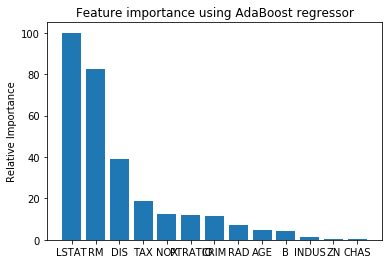

In [34]:
# arranging the ticks on the X_axis for the bar grapg
pos = np.arange(index_sorted.shape[0]) + 0.5

# plotting the bar graph
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()